# Intro to Cameras

### In this tutorial, we will cover the basics of taking a photo using a USB webcam connected to your PYNQ Board and displaying and saving that photo. This can be used to interpret many kinds of data such as images of people or objects (covered in the computer vision breakout session) or to read in other information such as barcodes and numbers.

### Step 1: Load Overlay
Our PYNQ Board has a Field Programmable Gate Array (FPGA) on it that must be programmed before we begin using the board. We apply designs called overlays that we can design however we want. For the first part of this tutorial, we are going to use the pre-built base overlay.

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

### Step 2: Import Stuff We Need
Here we tell the board what libraries we want to use in our project.

In [2]:
import cv2
from matplotlib.image import imsave
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

### Step 3: Initialize Webcam
After plugging in our USB webcam, we must tell the board what size images it is going to be recording and sending to the board. We also need to create a python object that will store the images we read from the webcam.

In [3]:
#create object
videoIn = cv2.VideoCapture(0)

#set input width and height
input_frame_width = 640
input_frame_height = 480
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, input_frame_width);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, input_frame_height);

#check to ensure the webcam is open
if(videoIn.isOpened()):
    print('camera is ready')
else:
    print('error starting camera, run this cell again')

camera is ready


### Step 4: Take Photo
Once we have our board setup and webcam working, it is time to use it! using videoIn.read(), we can read what the webcam is looking at at any given moment. This function has two return values. The first tells us if we successfully read an image or not. True means we did, false means there was a problem. The second return value is a frame object, which is the actual image we read.

In [4]:
#read frame
success, frame = videoIn.read()
#if there was an error, tell us!
if (success != True):
    print("Video Read Error")
else :
    frame_orig = frame
    frame = frame[:,:,[2,1,0]]

### Step 5: Display Photo
Using matplotlib imported earlier, we can display our image right in our Jupyter notebook

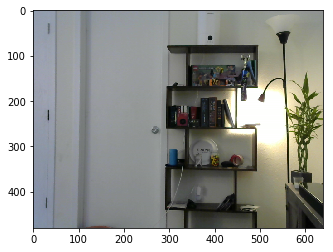

In [5]:
#display input
plt.imshow(frame)
plt.show()

### Step 6: Apply Various Operations to Photo
Try out filtering and cropping operations available in numpy and opencv

#### Blur the Image

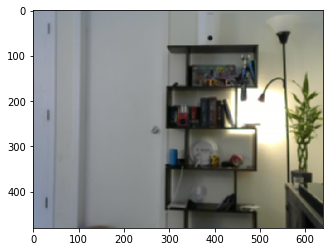

In [6]:
# Default Blur
m1 = cv2.blur(frame,(5,5))
plt.imshow(m1)
plt.show()

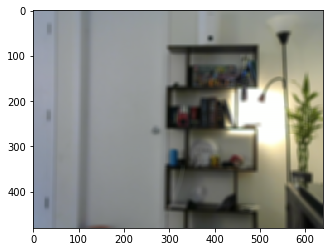

In [7]:
# Box filter blur
m2 = cv2.boxFilter(frame, -1, (10, 10), normalize=True)  
plt.imshow(m2)
plt.show()

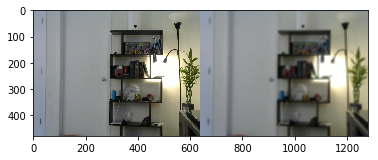

In [8]:
# Show original and blurred images side by side
plt.imshow(np.hstack((frame, m2)))
plt.show()

#### Edge detection using Sobel/Scharr filters

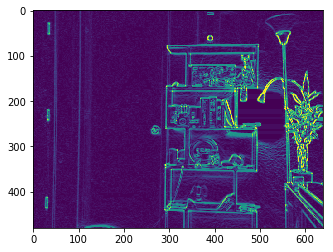

In [9]:
# Edge detection filters

scale = 1
delta = 0

# The depth of the output image. We set it to CV_16S to avoid overflow
ddepth = cv2.CV_16S

# Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
src = cv2.GaussianBlur(frame, (3, 3), 0)

# Convert the image to grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Gradient-X 
# Order of derivative is 1 in X direction
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Gradient-Y
# Order of derivative is 1 in Y direction
# Scharr gives stronger edges as compared to Sobel
grad_y = cv2.Scharr(gray,ddepth,0,1)
#grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Combine X and Y edge components
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Display the image
plt.imshow(grad)
plt.show()

#### Flip image

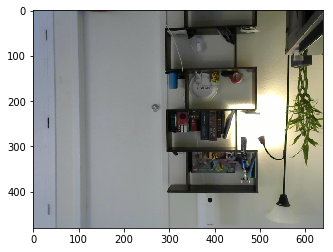

In [10]:
# Flip Along two dimensions

plt.imshow(np.flip(frame,0))
#plt.imshow(np.flip(frame,1))
plt.show()

#### Show RGB components of image

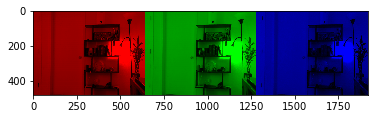

In [11]:
# Zero everything but red
testframe_r = np.copy(frame)
testframe_r[:,:,1] = 0
testframe_r[:,:,2] = 0

# Zero everything but green
testframe_g = np.copy(frame)
testframe_g[:,:,0] = 0
testframe_g[:,:,2] = 0

# Zero everything but blue
testframe_b = np.copy(frame)
testframe_b[:,:,0] = 0
testframe_b[:,:,1] = 0

plt.imshow(np.hstack((testframe_r, testframe_g, testframe_b)))
plt.show()

#### Crop and Resize Image

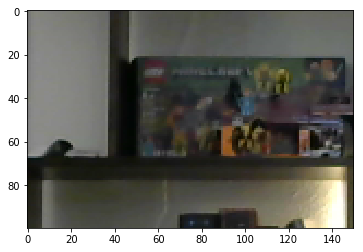

In [12]:
# Crop
cropped_frame = frame[100:200,300:450,:]
plt.imshow(cropped_frame)
plt.show()

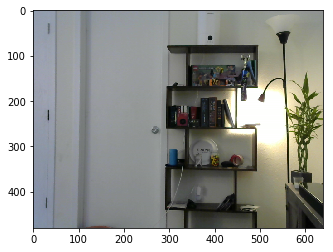

In [13]:
# Resize image
scale_percent = 60 # percent of original size
dim = (input_frame_width, input_frame_height)

resized_frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_frame)
plt.show()

### Step 7: Save Photo
Using matplotlib imported earlier, we can save our image

In [14]:
imsave("frame.png", frame)